### Extractive_Text_Summarization_Part1 
#### Using TF-IDF score for only noun and verb POS tags(For detailed discussion of different methods see Part2)

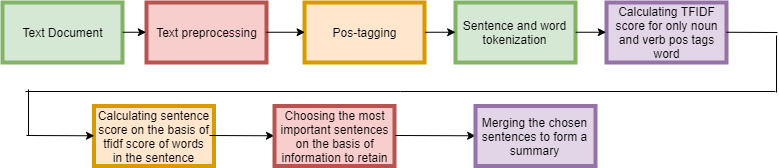

#### Text Preprocessing
After model reading the text document, the text document goes to preprocessing module which does the followings in the sequence mentioned below:
1. Lower case the text
2. Removing special characters
3. Removing numbers
4. Tokenize the text
5. Remove the stop words
6. Remove the words which have length equal to 1 after removing special characters and numbers.

In [9]:
###import libraries
import nltk
import os
import re
import math
import operator
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()

In [11]:
def lemmatize_words(words):
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(wordlemmatizer.lemmatize(word))
    return lemmatized_words

def stem_words(words):
    stemmed_words = []
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words


def remove_special_characters(text):
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    return text



In [16]:
###Calculating the frequency of each word in the document

In [15]:
def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        dict_freq[word] = words.count(word)
    return dict_freq

Calculating sentence score
As the score given to each sentence decides the importance of the sentence, it is important to choose the correct algorithm to find the score. In this approach, we will be using TFIDF score of each word to calculate the total sentence score.

The score of each sentence can be calculated using sentence_importance function. It involves POS tagging of words in the sentence by pos_tagging function.This function returns only the noun and verb tagged words. The returned words from pos_tagging function are sent to word_tfidf function to calculate the score of that word in the document by calculating its tfidf score.

In [17]:
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word,tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
             pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb

In [18]:
###Note : The above function returns only the nouns and verbs from the text.

In [36]:
def tf_score(word,sentence):
    freq_sum = 0
    word_frequency_in_sentence = 0
    len_sentence = len(sentence)
    for word_in_sentence in sentence:
        if word == word_in_sentence:
            word_frequency_in_sentence = word_frequency_in_sentence + 1
    tf =  word_frequency_in_sentence/ len_sentence
    return tf

In [37]:
def idf_score(no_of_sentences,word,sentences):
    no_of_sentence_containing_word = 0
    for sentence in sentences:
        sentence = remove_special_characters(str(sentence))
        sentence = re.sub(r'\d+', '', sentence)
        sentence = sentence.split()
        sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
        sentence = [word.lower() for word in sentence]
        sentence = [wordlemmatizer.lemmatize(word) for word in sentence]
        if word in sentence:
            no_of_sentence_containing_word = no_of_sentence_containing_word + 1
    idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
    return idf

In [38]:
def tf_idf_score(tf,idf):
    return tf*idf

In [39]:
def word_tfidf(dict_freq,word,sentences):
    word_tfidf = [] 
    tf = tf_score(word,sentences)
    idf = idf_score(len(sentences),word,sentences)
    tf_idf = tf_idf_score(tf,idf)
    return tf_idf

Finding most important sentences

To find the most important sentences, take the individual sentences from tokenized sentences and compute the sentence score. After calculating the scores, the top sentences based on the retention rate provided by the user are included in the summary.

In [40]:
def sentence_importance(sentence,dict_freq,sentences):
    
    sentence_score = 0
    sentence = remove_special_characters(str(sentence)) 
    sentence = re.sub(r'\d+', '', sentence)
    pos_tagged_sentence = [] 
    no_of_sentences = len(sentences)
    pos_tagged_sentence = pos_tagging(sentence)
    for word in pos_tagged_sentence:
        if word.lower() not in Stopwords and word not in Stopwords and len(word)>1: 
            word = word.lower()
            word = wordlemmatizer.lemmatize(word)
            sentence_score = sentence_score + word_tfidf(dict_freq,word,pos_tagged_sentence)
    return sentence_score

In [51]:
file = 'input_txt_for_summary.txt'   ###File whose summary needs to be generated
file = open(file , 'r',encoding = 'utf-8')
text = file.read()

tokenized_sentence = sent_tokenize(text)
text = remove_special_characters(str(text))

text = re.sub(r'\d+', '', text)
tokenized_words_with_stopwords = word_tokenize(text)

tokenized_words = [word for word in tokenized_words_with_stopwords if word not in Stopwords]
tokenized_words = [word for word in tokenized_words if len(word) > 1]
tokenized_words = [word.lower() for word in tokenized_words]


tokenized_words = lemmatize_words(tokenized_words)
word_freq = freq(tokenized_words)
input_user = int(input('Percentage of information to retain(in percent):'))
no_of_sentences = int((input_user * len(tokenized_sentence))/100)
print('No. of sentences in the summary will be:')
print(no_of_sentences)







Percentage of information to retain(in percent):10
5


In [52]:
c = 1
sentence_with_importance = {}
for sent in tokenized_sentence:
    sentenceimp = sentence_importance(sent,word_freq,tokenized_sentence)
    sentence_with_importance[c] = sentenceimp
    c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(), key=operator.itemgetter(1),reverse=True)
cnt = 0
summary = []
sentence_no = []

for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt+1
    else:
        break
sentence_no.sort()

In [58]:
len(sentence_with_importance)

50

In [53]:
cnt = 1
for sentence in tokenized_sentence:
    if cnt in sentence_no:
        summary.append(sentence)
    cnt = cnt+1
    
summary = " ".join(summary)
print("\n")
print("Summary:")
print(summary)

#outF = open('summary.txt',"w")
#outF.write(summary)



Summary:
In the final episode of Mirzapur, Munna blew Bablu’s precious brains out, removing a competitor from his path and inching closer to claiming his father’s opium-and-guns empire. Like a Marvel Cinematic Universe franchise that stretches on unto eternity, a time-bound story revolving around revenge for fresh wounds is threatening to evolve into a saga that will persist for a few more seasons. Akhandanand, known as Kaleen Bhaiya for running a carpet factory that concealed his real business, had seemingly handed over the baton to the unstable Munna – but hold that thought. The chief minister’s brother JP Yadav (Pramod Pathak) – a holdover from the first season – is outraged at the slight and bides his time in the company of his svelte secretary. But they’ve forgotten one adage in the compulsion to move towards yet another season: “kill your babies.” Many die in Mirzapur – some who shouldn’t have and others who needed to have.
